In [ ]:
library(tidyverse)
# adding LaTeX default fonts
font_add("CMU Serif", "/Users/stawager/Downloads/cmu-serif/cmunrm.ttf")
font_add("CMU Serif Bold", "/Users/stawager/Downloads/cmu-serif/cmunbx.ttf")
font_add("CMU Serif Italic", "/Users/stawager/Downloads/cmu-serif/cmunti.ttf")
font_add("CMU Serif Italic Bold", "/Users/stawager/Downloads/cmu-serif/cmunbi.ttf")
showtext::showtext_auto()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv("results.csv")

In [3]:
glimpse(df)

Rows: 51
Columns: 5
$ zad       <int> 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ L         <int> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10, 1…
$ iter      <int> 17260, 21178, 4262, 3648, 3363, 2720, 4686, 52083, 14670, 12…
$ time      <dbl> 1.638453e+00, 2.088557e+00, 3.950851e-01, 3.386419e-01, 3.13…
$ evolution <chr> "5045;4954;5030;5065;5143;5076;5175;5174;5123;5190;5041;4987…


In [5]:
zad1 <- df %>%
    filter(zad==1)

In [ ]:
zad1_evo <- as.integer(unlist(strsplit(zad1$evolution, ";")))

In [ ]:
max1_y <- max(zad1_evo)
max1_x <- match(max1_y, zad1_evo)
max1_x
max1_y


[1] 2606

[1] 8693

In [96]:
max2_y <- max(zad1_evo[8000:10000])
max2_x <- match(max2_y, zad1_evo[8000:10000])+8000
max2_x
max2_y

[1] 9078

[1] 6890

In [100]:
min2_y <- min(zad1_evo[13000:14000])
min2_x <- match(min2_y, zad1_evo[13000:14000])+13000
min2_x
min2_y

[1] 13469

[1] 152

In [101]:
# adding LaTeX default fonts
font_add("CMU Serif", "/Users/stawager/Downloads/cmu-serif/cmunrm.ttf")
font_add("CMU Serif Bold", "/Users/stawager/Downloads/cmu-serif/cmunbx.ttf")
font_add("CMU Serif Italic", "/Users/stawager/Downloads/cmu-serif/cmunti.ttf")
font_add("CMU Serif Italic Bold", "/Users/stawager/Downloads/cmu-serif/cmunbi.ttf")
showtext::showtext_auto()

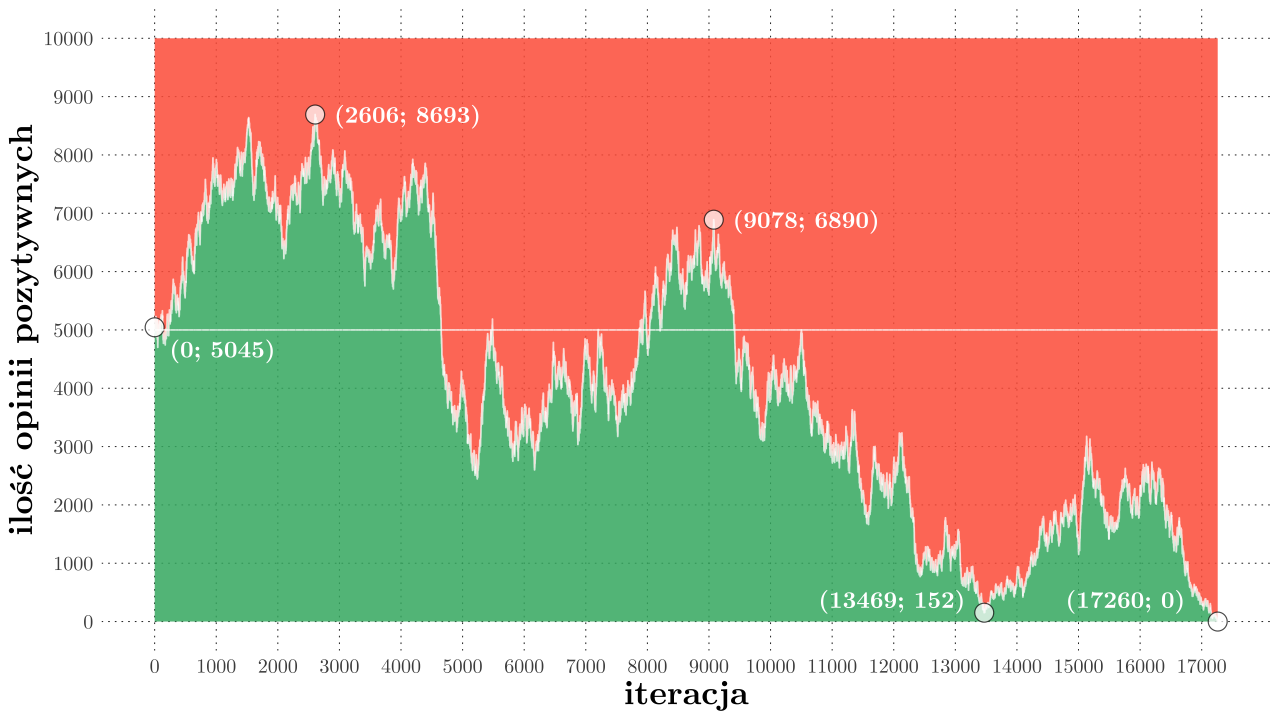

In [ ]:
scale <- 1.5
options(
    repr.plot.width = 16/scale, 
    repr.plot.height = 9/scale)

# colors
goodcolor <- "mediumseagreen"
badcolor <- "tomato"

# plot
ggplot() + 
    aes(x = 1:zad1$iter, 
        y = zad1_evo) +

    # 'yes' fill
    geom_ribbon(
        aes(ymin = 0, 
            ymax = zad1_evo), 
        fill = goodcolor, 
        alpha = .85) +

    # 'no' fill
    geom_ribbon(
        aes(ymin = zad1_evo, 
            ymax = zad1$L^2),
        fill = badcolor, 
        alpha = .85) +

    # evolution line / lineplot
    geom_line(
        linewidth = .5, 
        color = "white", 
        alpha = .71) +

    # starting point
    geom_point(
        aes(x = 0, 
            y = zad1_evo[1]), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = 0+1100, 
        y = zad1_evo[1]-375, 
        label = glue::glue("(0; {zad1_evo[1]})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # end point
    geom_point(
        aes(x = zad1$iter, 
            y = tail(zad1_evo, 1)), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = zad1$iter-1500, 
        y = tail(zad1_evo, 1)+375, 
        label = glue::glue("({zad1$iter}; {tail(zad1_evo, 1)})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # max1 point
    geom_point(
        aes(x = max1_x, 
            y = max1_y), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = max1_x+1500, 
        y = max1_y, 
        label = glue::glue("({max1_x}; {max1_y})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # max2 point
    geom_point(
        aes(x = max2_x, 
            y = max2_y), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = max2_x+1500, 
        y = max2_y, 
        label = glue::glue("({max2_x}; {max2_y})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # almostmin point
    geom_point(
        aes(x = min2_x, 
            y = min2_y), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = min2_x-1500, 
        y = 375, 
        label = glue::glue("({min2_x}; {min2_y})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # 50% line
    geom_line(
        aes(x = 1:zad1$iter, 
            y = zad1$L^2/2), 
        alpha = .71,
        color = "white") +

    # styling    
    theme_minimal() +
    labs(
        x = "iteracja", 
        y = "ilość opinii pozytywnych") +
    scale_y_continuous(
        breaks = seq(0, zad1$L^2, by = 1000), 
        limits = c(0, NA)) +
    scale_x_continuous(
        breaks = seq(0, zad1$iter, by = 1000)) +
    theme( 
        text = element_text(family = "CMU Serif"),
        axis.text = element_text(size=12),
        axis.title = element_text(size = 20, family = "CMU Serif Bold"),
        axis.title.y.right = element_text(color = badcolor),
        panel.grid = element_line(linetype = "dotted", linewidth = 0.25, color = "black"),
        panel.grid.minor = element_blank())